## Chapter 2 - Exercises Introduction to statistical learning

# 8.

In [8]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('College.csv',index_col=0)

In [5]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


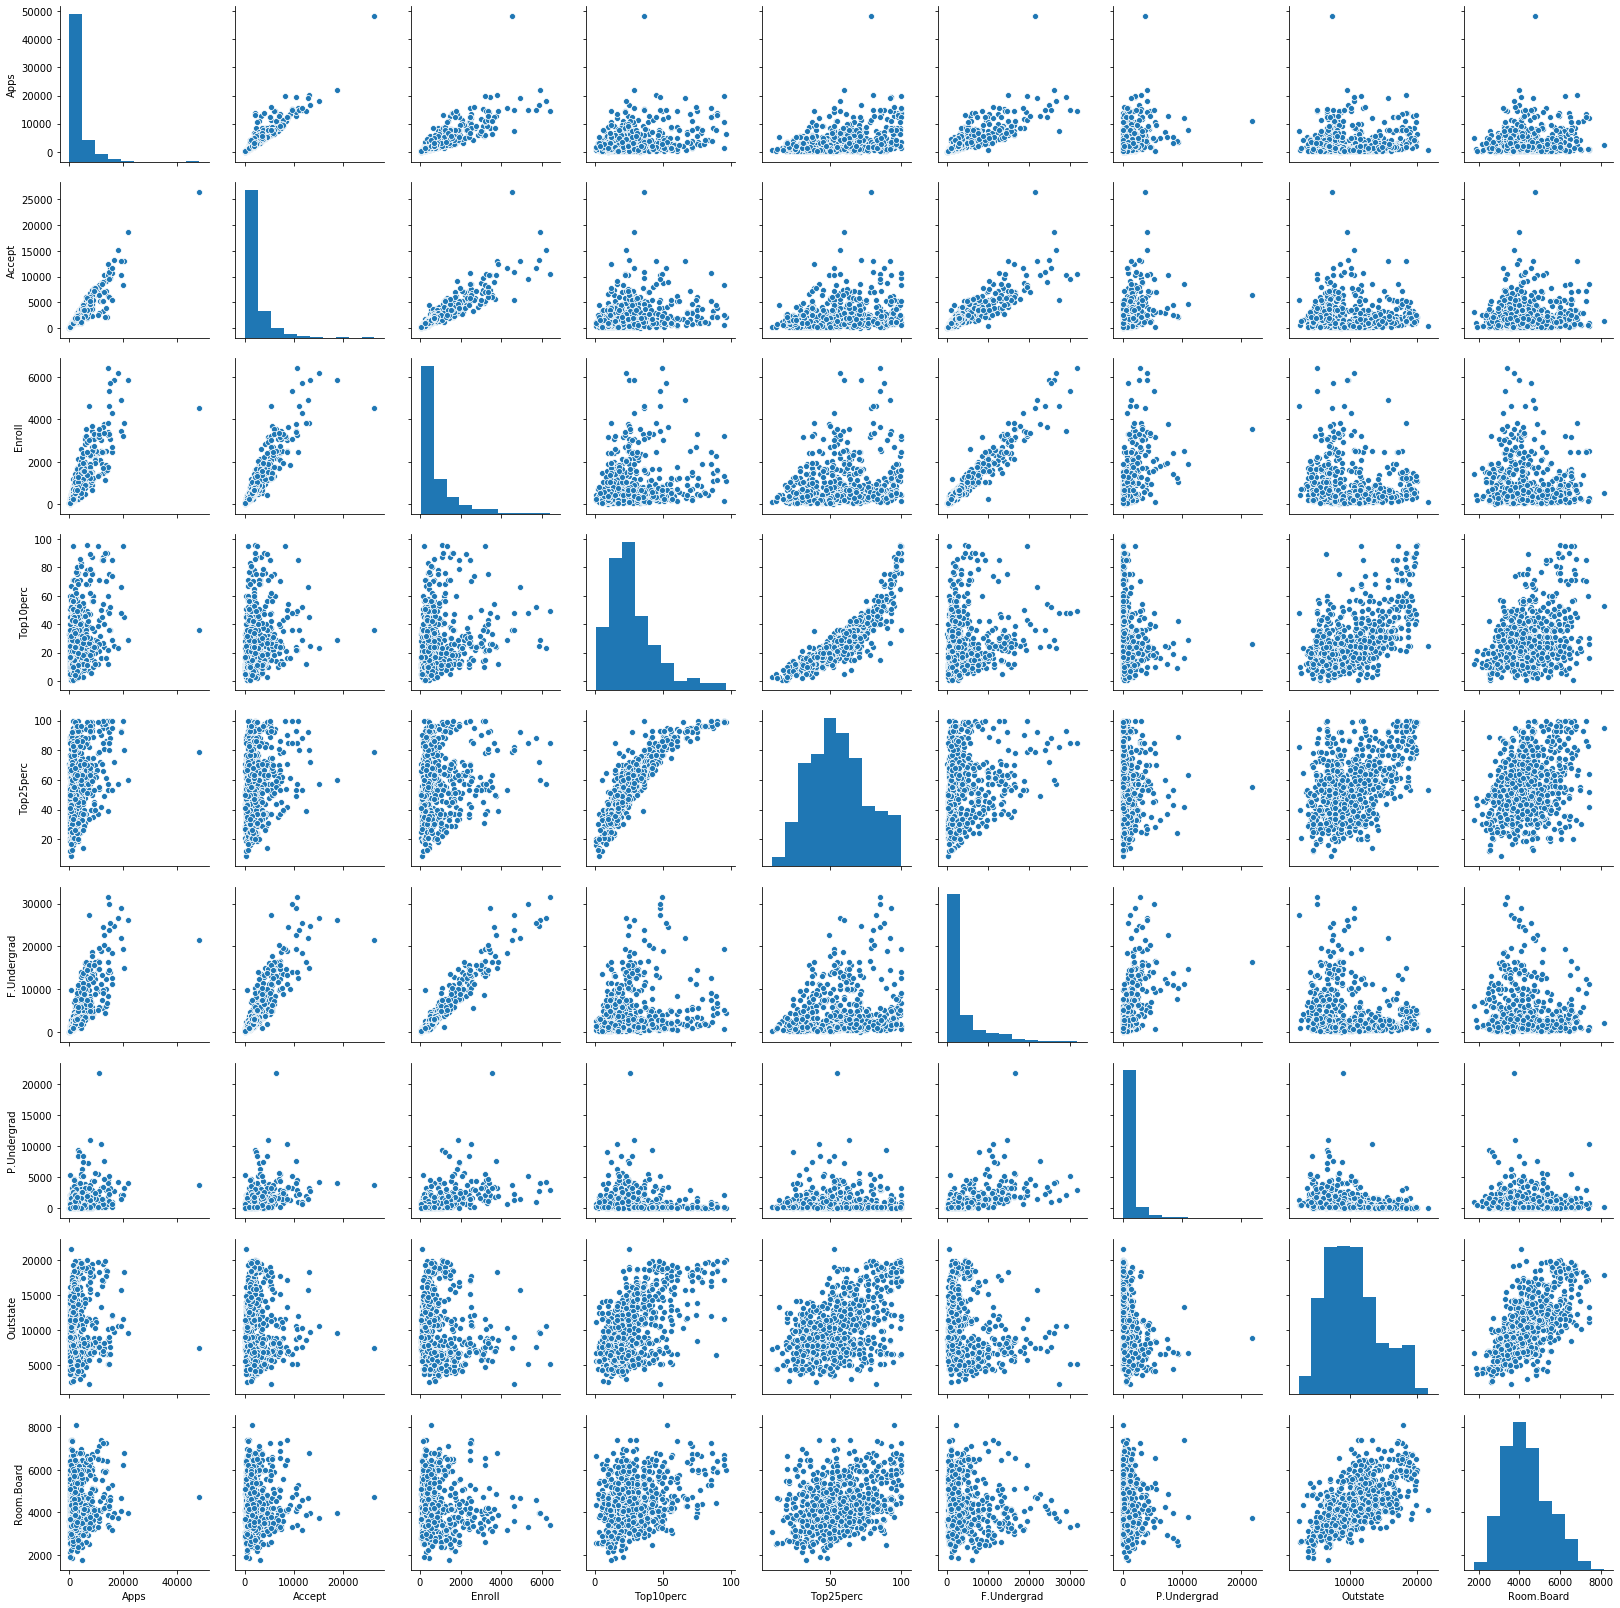

In [28]:
sns.pairplot(df.iloc[:,1:10])

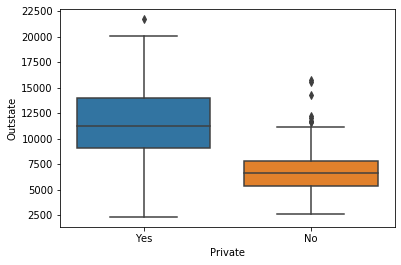

In [45]:
sns.boxplot(x = df['Private'],y=df['Outstate'])

In [47]:
# 8c iv. Create a new qualitative variable, called Elite, by binning the Top10perc variable. 
# We are going to divide universities into two groups based on whether or not the proportion 
# of students coming from the top 10% of their high school classes exceeds 50 %.

df['Elite'] = df['Top10perc'] > 50

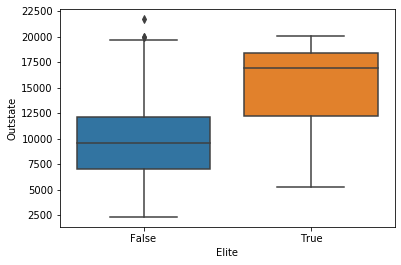

In [52]:
sns.boxplot(x='Elite',y='Outstate',data=df)

In [55]:
# how many top universities are there
df.Elite.sum()

78

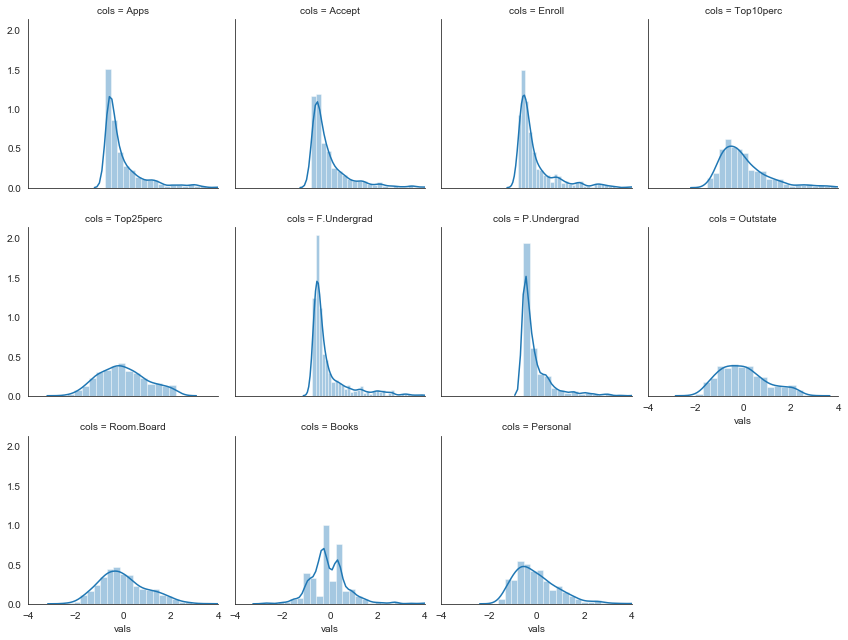

In [92]:
#8v)
sns.set_style('white')
# scale
def scale(df):
    return (df-df.mean())/df.std()



# melt function to transform the dataframe into one column with all the information
df_norm = df.iloc[:,1:12].apply(scale)
df_melted = df_norm.melt(var_name='cols',value_name='vals')

# Plot using facetgrid
g = sns.FacetGrid(df_melted, col='cols', col_wrap=4)
g.map(sns.distplot, 'vals')
g.set(xlim=(-4, 4));

# 9.

In [101]:
auto = pd.read_csv('Auto.csv')

auto.isnull().any(axis=1).sum() == 0
# ...there are none
# ah, ? is used for missing values
auto = auto.drop(auto[auto.values == '?'].index)

datatypes = {'quant': ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration'],
             'qual': ['origin', 'name']}

auto_quant = auto[datatypes['quant']].astype(np.float_)

In [109]:
# what is the range of each quantitative predictor?
pd.DataFrame({'Range': auto_quant.max()-auto_quant.min(),
              'mean':auto_quant.mean(),
              'Standard deviation':auto_quant.std()})

,Range,mean,Standard deviation
mpg,37.6,23.445918,7.805007
cylinders,5.0,5.471939,1.705783
displacement,387.0,194.411990,104.644004
horsepower,184.0,104.469388,38.491160
weight,3527.0,2977.584184,849.402560
acceleration,16.8,15.541327,2.758864


In [114]:
auto_quant_d = auto_quant.drop(auto_quant.index[10: 85])

In [116]:
pd.DataFrame({'Range': auto_quant_d.max()-auto_quant_d.min(),
              'mean':auto_quant_d.mean(),
              'Standard deviation':auto_quant_d.std()})

,Range,mean,Standard deviation
mpg,35.6,24.374763,7.872565
cylinders,5.0,5.381703,1.658135
displacement,387.0,187.880126,100.169973
horsepower,184.0,101.003155,36.003208
weight,3348.0,2938.854890,811.640668
acceleration,16.3,15.704101,2.719913


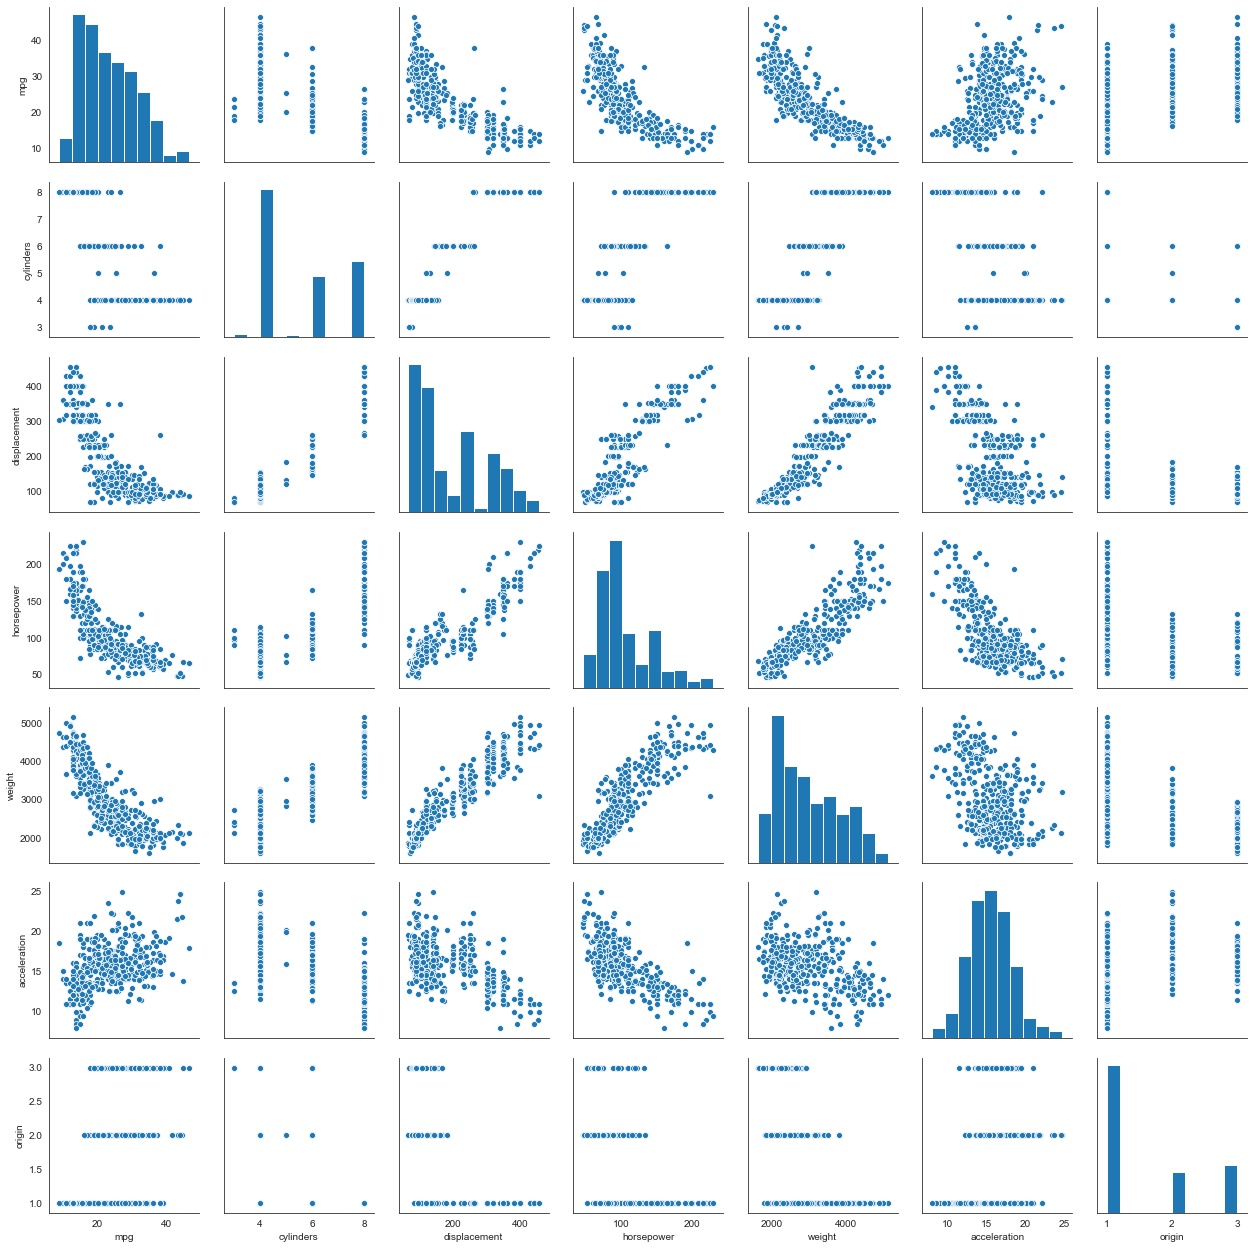

In [120]:
# 8e)

auto = pd.concat([auto_quant,auto[datatypes['qual']]],axis=1)
sns.pairplot(auto)